In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import datetime
%matplotlib inline

/Users/aristotle/.virtualenvs/jupyter/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data = pd.read_csv('realDonaldTrump_tweets.csv')

In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index(['created_at'], drop=True, inplace=True)

In [5]:
data['count'] = 1

In [6]:
data.groupby(['source'])['count'].sum()

source
Instagram                 2
Media Studio              1
Periscope                 1
Twitter Ads               1
Twitter Web Client      273
Twitter for Android    1438
Twitter for iPad         22
Twitter for iPhone     1462
Name: count, dtype: int64

In [7]:
count_words = lambda x: len(x.split())
character_count = lambda x: len(x)
tokenize = lambda x: nltk.word_tokenize(x.decode('utf-8'))
sentence_count = lambda x: len(nltk.sent_tokenize(x.decode('utf-8')))

In [8]:
data['word_count'] = data['text'].apply(count_words)

In [9]:
data['character_count'] = data['text'].apply(character_count)

In [10]:
data['sentence_count'] = data['text'].apply(sentence_count)

In [11]:
data['tokens'] = data['text'].apply(tokenize)

In [12]:
data['token_count'] = data['tokens'].apply(character_count)

In [13]:
data.head()

,id,text,source,count,word_count,character_count,sentence_count,tokens,token_count
created_at,,,,,,,,,
2017-02-22 12:50:56,834384982495940613,Very much enjoyed my tour of the Smithsonian's...,Twitter for Android,1,22,140,1,"[Very, much, enjoyed, my, tour, of, the, Smith...",26
2017-02-22 12:20:40,834377364947816448,"One thing I will say about Rep. Keith Ellison,...",Twitter for Android,1,29,137,1,"[One, thing, I, will, say, about, Rep., Keith,...",32
2017-02-21 23:23:13,834181712783560705,The so-called angry crowds in home districts o...,Twitter for Android,1,21,136,2,"[The, so-called, angry, crowds, in, home, dist...",25
2017-02-21 20:46:42,834142323881684993,'Americans overwhelmingly oppose sanctuary cit...,Twitter for iPhone,1,6,74,1,"['Americans, overwhelmingly, oppose, sanctuary...",9
2017-02-21 00:38:40,833838311315763200,Congratulations to our new National Security A...,Twitter for iPhone,1,13,131,3,"[Congratulations, to, our, new, National, Secu...",21


In [14]:
def histogram(data, start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    data['x'] = data.index
    data = data[(data.x>datetime.date(year=start.year,month=start.month,day=start.day))\
                &(data.x<=datetime.date(year=end.year,month=end.month,day=end.day))]
    data = data
    time_10 = data.groupby(pd.TimeGrouper(freq='10Min'))['count', 'character_count'].sum()
    grp = time_10.groupby(by=[time_10.index.map(lambda x : '{0:02}:{1:02}'.format(x.hour, x.minute))]).sum()
    grp = grp.fillna(0)
    grp['count'].plot()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


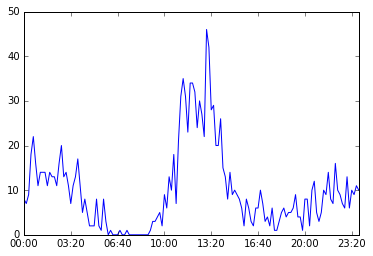

In [15]:
histogram(data[data.source=='Twitter for Android'], '2016-01-20', '2017-02-20');

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


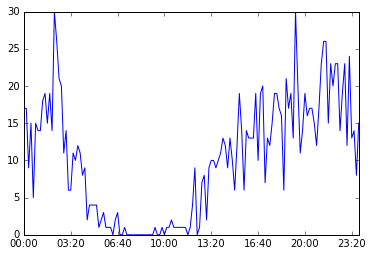

In [17]:
histogram(data[data.source=='Twitter for iPhone'], '2016-01-20', '2017-02-20');

/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


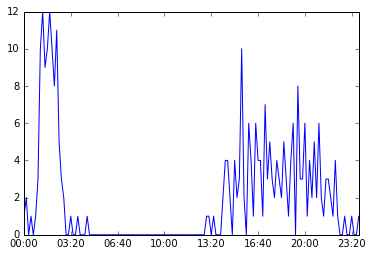

In [87]:
histogram(data[data.source=='Twitter Web Client'], '2016-01-20', '2017-02-20')